In [262]:
import zipfile

from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2 as cv
import numpy as np
from kraken import pageseg

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract"

In [30]:
face_cascade = cv.CascadeClassifier("Downloads/haarcascade_frontalface_default.xml")

In [349]:
dic = {}
with zipfile.ZipFile(r"Downloads\small_img.zip") as archive:
    for entry in archive.infolist():
        with archive.open(entry) as file:
            img = Image.open(file)
            name = entry.filename
            dic[name] = {'image':img}
            #bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
            text = pytesseract.image_to_string(img.convert('1'))
            #for box in bounding_boxes:
                #img_sm = img.crop(box)
                #img_rs = img_sm.resize((img_sm.width*10, img_sm.height*10), Image.BICUBIC)
                #text_i = pytesseract.image_to_string(img_rs.convert('1'))
                #print(text_i)
                #text.append(text_i)
            dic[name]['text'] = text
            cv_img = np.array(img)
            gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.35, 4)
            pics = []
            for face in faces:
                pics.append(img.crop((face[0], face[1], face[0]+face[2], face[1]+face[3])))
            dic[name]['faces'] = pics

In [325]:
def ocr_scan(zipped):
    dic = {}
    with zipfile.ZipFile(zipped) as archive:
        for entry in archive.infolist():
            with archive.open(entry) as file:
                img = Image.open(file)
                #print(file)
                #display(img)
                name = entry.filename
                dic[name] = {'image':img}
                #bounding_boxes = pageseg.segment(img.convert('1'))['boxes']
                text = pytesseract.image_to_string(img.convert('1'))
                #for box in bounding_boxes:
                    #img_sm = img.crop(box)
                    #img_rs = img_sm.resize((img_sm.width*10, img_sm.height*10), Image.BICUBIC)
                    #text_i = pytesseract.image_to_string(img_rs.convert('1'))
                    #print(text_i)
                    #text.append(text_i)
                dic[name]['text'] = text
                cv_img = np.array(img)
                gray = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.33)
                pics = []
                for face in faces:
                    pics.append(img.crop((face[0], face[1], face[0]+face[2], face[1]+face[3])))
                dic[name]['faces'] = pics

In [346]:
keyword = input('Type keyword: ')
matches = {}
for key in dic.keys():
    if keyword in dic[key]['text']:
        matches[key] = dic[key]['faces']
    else:
        matches[key] = None

Type keyword: Mark


In [323]:
def create_contact_sheet(img_list, list_name, pic_size = 250):
    ffont = ImageFont.truetype("arial.ttf", 20)
    x = 0
    y = 30
    #first_image = img_list[0]
    if img_list == None:
        contact_sheet = Image.new('RGB', (pic_size*6, 60))
        drawing_object = ImageDraw.Draw(contact_sheet)
        drawing_object.text((x + 5 , y-27), f'Results found in {list_name}:', font=ffont)
        drawing_object.text((x + 5, y), f'But there were no faces in that file!', font=ffont)
        display(contact_sheet)
    else:
        contact_sheet = Image.new('RGB', (pic_size*6, pic_size*((len(img_list)//6) + 1) + 30))
        drawing_object = ImageDraw.Draw(contact_sheet)
        drawing_object.text((x + 5 , y-27), f'Results found in {list_name}:', font=ffont)
        for img in img_list:
            if img.width > pic_size or img.height > pic_size:
                img = img.resize((pic_size, pic_size), Image.BICUBIC)
            contact_sheet.paste(img, (x, y))
            if x + pic_size == contact_sheet.width:
                x = 0
                y = y + pic_size
            else:
                x = x + pic_size
        display(contact_sheet)

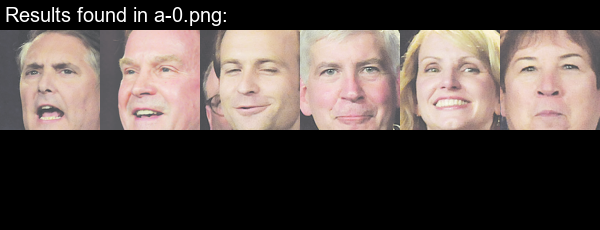

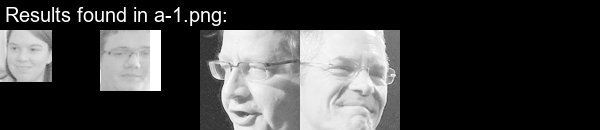

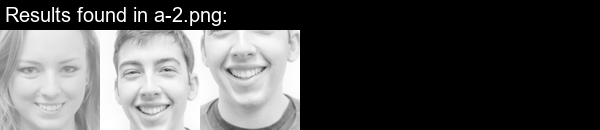

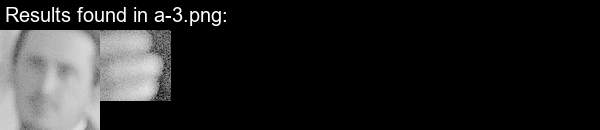

In [347]:
for i, name in enumerate(matches):
    create_contact_sheet(matches[list(matches.keys())[i]], name, 100)